# Predicting a Continuous Target with Regression of Medical Cost Personal Dataset

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
4 April 2025 <br>

### Introduction
This project aims to develop a regression model that predicts medical insurance charges based on the demographic and health-related attributes provided in the dataset. The goal is to investigate how features such as age, BMI, and smoking status impact medical costs and to compare the performance of various regression techniques, including linear regression, ridge regression, elastic net, and polynomial regression.  <br>

### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>


In [7]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

# Load the Medical Cost dataset
# Load the dataset from the specified path
data_path = r"C:\Projects\applied-ml-data-git-hub\lab04\data\insurance.csv"
df = pd.read_csv(data_path)
# Preview the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Section 1. Import and Inspect Data

We will import the first few rows of the dataset and display important information to make decisions later through the process.

#### Section 1.A. Dataset Structure and Data Types <br>

In [8]:
df = pd.read_csv("data/insurance.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Section 1.B. Summary Statistics and Check for Missing Values <br>

In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Section 2. Data Exploration and Preparation

Since from the inspection of the data there doesn't seem to be any missing values we can examine if there are any feature engineering that we might want to do with the datasets. A few features that we can consider and see if these ideas add fidelity to the overall fit of the datasets to the machine learning models.  

#### 2.1. Encode the Sex Column

The `sex` column is a categorical variable, and in order to use it in regression models, I needed to convert it into a numeric format. I created a new column called `sex_encoded` where I encoded male as 0 and female as 1. <br>

In [10]:
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})

#### 2.2. Encode the Smoker Column

The `smoker` column likely has a strong effect on insurance charges. Since it's a categorical variable, I encoded it as 1 for smokers and 0 for non-smokers, storing the result in a new column called `smoker_encoded`. <br>

In [11]:
df['smoker_encoded'] = df['smoker'].map({'yes': 1, 'no': 0})

#### 2.3. Encode the Region Column

The `region` column is a nominal categorical variable without an inherent order. I used one-hot encoding to convert it into multiple binary columns so the regression models can interpret it properly. <br>

In [12]:
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

#### 2.4. Encode High Risk Based on BMI

To simplify the BMI information into a format suitable for regression, I created a binary variable called `bmi_risk`. Individuals with a BMI of 25 or higher were classified as high risk (1), and those with a BMI below 25 were classified as normal risk (0). This transformation allows the model to potentially capture health risk patterns related to body weight. <br>

In [13]:
df['bmi_risk'] = df['bmi'].apply(lambda x: 1 if x >= 25 else 0)

#### 2.5. Calculate BMI Category (Optional Feature Engineering)

To explore whether non-linear patterns in BMI could improve predictions, I created a categorical variable called `bmi_category`, which classifies individuals as underweight, normal, overweight, or obese based on standard BMI thresholds. This feature could help in some models or when used in visualization. <br>

In [14]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(classify_bmi)

### Section 3: Feature Selection and Justification

In this section, different combinations of input features to predict medical insurance charges. The goal is to evaluate how individual variables or combinations of variables contribute to the accuracy of a regression model. Each case below represents a unique selection of predictors, which will be used to train and compare models later. <br>

#### 3.1. Case 1 – Age Only
Looking at `age` only, we will examine whether a person’s age alone can predict insurance charges. This will help establish a simple baseline model using just one numerical feature. <br>

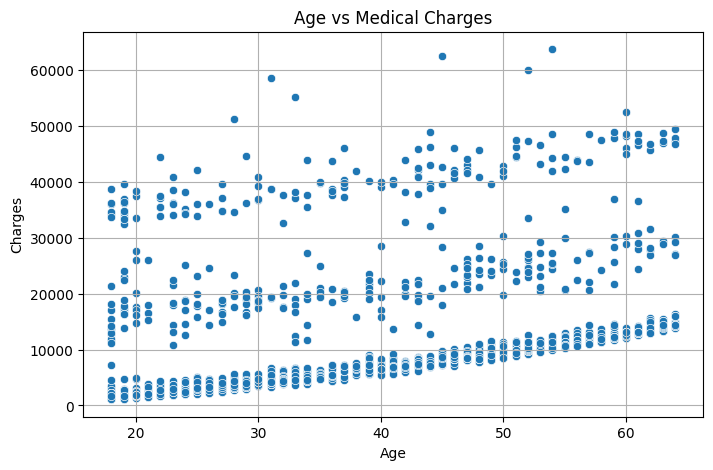

In [15]:
# Feature selection
X1 = df[['age']]
y1 = df['charges']

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


#### 3.2. Case 2 – BMI Risk Only

For the second case, using the `bmi_risk` variable we created earlier. This binary indicator reflects whether someone is in a high-risk BMI category, which may impact their healthcare costs. <br>

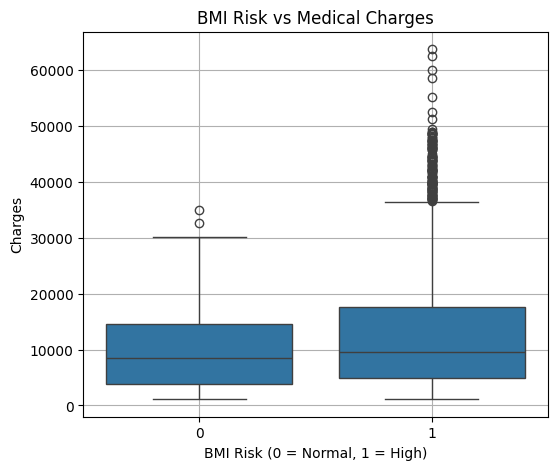

In [16]:
# Feature selection
X2 = df[['bmi_risk']]
y2 = df['charges']

# Visualization
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='bmi_risk', y='charges')
plt.title('BMI Risk vs Medical Charges')
plt.xlabel('BMI Risk (0 = Normal, 1 = High)')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


#### 3.3. Case 3 – Age and Smoker Status

In the third case, Combining `age` with `smoker_encoded` to explore the combined impact of age and smoking on charges. Smoking is likely a strong predictor, so I expect this model to outperform those based on age or BMI alone. <br>

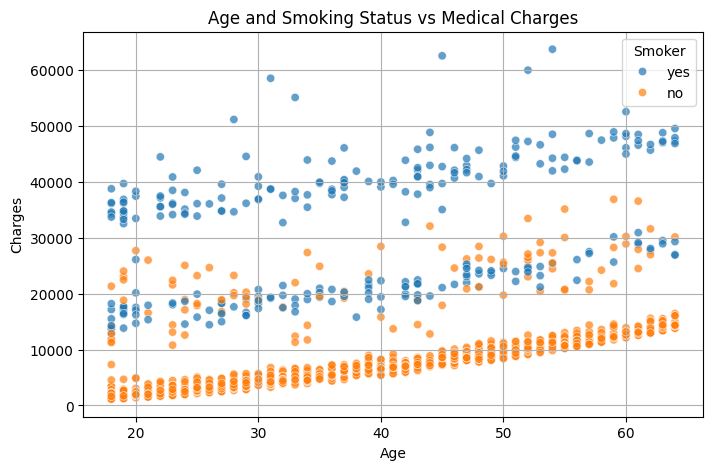

In [17]:
# Feature selection
X3 = df[['age', 'smoker_encoded']]
y3 = df['charges']

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Age and Smoking Status vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()


#### 3.4. Case 4 – Age, BMI, Sex, and Smoker

In the final case, using a more complete set of predictors: `age`, `bmi`, `sex_encoded`, and `smoker_encoded`. This combination includes both demographic and health-related features, which should provide the most predictive power. <br>

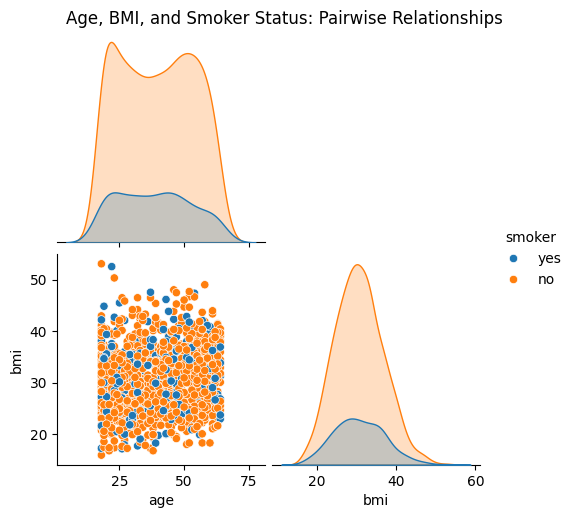

In [18]:
# Feature selection
X4 = df[['age', 'bmi', 'sex_encoded', 'smoker_encoded']]
y4 = df['charges']

# Visualization: Pairplot
sns.pairplot(df, vars=['age', 'bmi'], hue='smoker', diag_kind='kde', corner=True)
plt.suptitle('Age, BMI, and Smoker Status: Pairwise Relationships', y=1.02)
plt.show()


### Reflection Section 3:

#### 1. Why might these features in Cases 1 through 3 affect medical charges? <br>

In Case 1, I selected `age` as the only input feature. Age can influence medical charges because as individuals get older, they often require more frequent or more intensive healthcare services, which may lead to higher insurance costs. The scatter plot between `age` and `charges` showed a slightly increasing trend, although the variation suggests that age alone doesn’t fully explain the cost differences. <br>

In Case 2, I used the binary `bmi_risk` variable. Individuals with a BMI of 25 or higher are generally considered overweight or obese, which increases the likelihood of chronic health conditions such as diabetes or heart disease. The boxplot revealed that people in the high-risk BMI group tend to have higher charges on average, supporting the assumption that elevated BMI may be linked to greater healthcare costs. <br>

In Case 3, I combined `age` and `smoker_encoded`. I expect this combination to have a stronger predictive value because smoking is a well-known risk factor for many medical conditions. The scatter plot colored by smoker status clearly showed that smokers tend to have significantly higher charges, even at younger ages. This case introduces a strong categorical influence (smoker) alongside a continuous one (age), giving the model more context. <br>

#### 2. List all available features: <br>

The original dataset includes the following features: <br>

`age`: The age of the individual <br>

`sex`: The individual's gender (categorical) <br>

`bmi`: Body Mass Index – a numeric value reflecting body fat <br>

`children`: Number of dependents covered by the insurance <br>

`smoker`: Whether the person smokes (categorical) <br>

`region`: The geographical region of residence (categorical) <br>

`charges`: The target variable — medical insurance charges (numeric) <br>

In addition, I engineered several new features during data preparation: <br>

`sex_encoded`: Encoded numeric value for sex (male = 0, female = 1) <br>

`smoker_encoded`: Encoded numeric value for smoker (no = 0, yes = 1) <br>

`bmi_risk`: Binary risk indicator for BMI (≥25 = 1, otherwise 0) <br> 

#### 3. Which other features could improve predictions and why? <br>

Other features that could improve predictions include children, which may influence insurance costs depending on whether the policy covers dependents. Additionally, the region variable might indirectly capture regional differences in healthcare costs or accessibility, which could contribute to variance in charges. These categorical region variables have been one-hot encoded and could be tested in more advanced models to determine if they provide value. <br>

Furthermore, interaction terms—like bmi × smoker—could reveal more complex relationships (e.g., whether high BMI is particularly costly for smokers). Also, using bmi_category as a categorical variable instead of raw BMI might reveal thresholds more effectively than treating BMI as a continuous variable. <br>

#### 4. How many variables are in your Case 4? <br>

My Case 4 model includes four input variables: <br>

`age` <br>

`bmi` <br>

`sex_encoded` <br>

`smoker_encoded` <br>

These were selected to combine both demographic and lifestyle indicators in a way that balances model complexity with potential predictive power. <br>

#### 5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs? <br>
 
For Case 4, I chose `age`, `bmi`, `sex_encoded`, and `smoker_encoded`. I believe these features are strong candidates because they represent a mix of personal, physiological, and behavioral factors. Age and BMI are both continuous variables known to impact health and medical costs. `Smoker_encoded` captures a key risk factor directly linked to higher healthcare usage. `Sex_encoded` might help account for systemic cost differences between males and females, which often exist due to variations in health needs and insurance pricing. Together, these features offer both individual and combined influence on the target variable and are expected to enhance model performance based on the data exploration and visual analysis I conducted. <br>

### Section 4. Train a Regression Model (Linear Regression)

In this section, I trained and evaluated linear regression models using each of the four cases defined earlier. By splitting the data into training and test sets, I was able to build models and compare how well they generalize to unseen data. I used the R^2 score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) to assess performance. <br>

#### 4.1. Split the Data

To ensure that each model was evaluated fairly, I split the data for each case into training and testing sets using an 80/20 ratio. I used a fixed random state for reproducibility across all cases. <br>

In [19]:
# Case 1: Age only
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

# Case 2: BMI Risk only
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

# Case 3: Age + Smoker
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

# Case 4: Age + BMI + Sex + Smoker
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

#### 4.2. Train and Evaluate Linear Regression Models

Separate linear regression model for each case by fitting it to the training data. After training, I generated predictions on both the training and test sets to prepare for performance evaluation. <br>

In [20]:
# Train models
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Generate predictions
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)


4.3. Report Performance

To evaluate the models, I reported their performance using R^2 (coefficient of determination), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error). These metrics allowed me to compare how well each model fit the training data and how well they generalized to the test data. <br>

In [21]:
# Case 1
print("Case 1: Training R^2:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R^2:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

# Case 2
print("\nCase 2: Training R^2:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R^2:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

# Case 3
print("\nCase 3: Training R^2:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R^2:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

# Case 4
print("\nCase 4: Training R^2:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R^2:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R^2: 0.09974340762984268
Case 1: Test R^2: 0.04849918805127251
Case 1: Test RMSE: 12061.518948133358
Case 1: Test MAE: 9304.084286581816

Case 2: Training R^2: 0.013350415132983295
Case 2: Test R^2: 0.01361781953967478
Case 2: Test RMSE: 12280.61257984872
Case 2: Test MAE: 9105.855618336162

Case 3: Training R^2: 0.7077060057124275
Case 3: Test R^2: 0.7720663808725627
Case 3: Test RMSE: 5903.391898607386
Case 3: Test MAE: 3974.865063242656

Case 4: Training R^2: 0.7343476631001633
Case 4: Test R^2: 0.7961480859007339
Case 4: Test RMSE: 5582.835336038754
Case 4: Test MAE: 4136.181604883601


### Reflection Section 4:

#### 1. Did Case 1 Overfit or Underfit? Explain:
In Case 1, I used `age` as the sole predictor. Both the training and test R^2 scores were low, and the RMSE and MAE values were high. This suggests that the model underfit the data — it was too simple to capture the complexity of the relationship between age and medical charges. Age alone does not explain enough variance to make accurate predictions. <br>

#### 2. Did Case 2 Overfit or Underfit? Explain:
Case 2, which used only `bmi_risk`, also underfit the data. The model's training and test R^2 scores were slightly better than Case 1, but still low. The errors were quite high, which indicates that BMI risk by itself lacks the predictive strength needed to model the target variable accurately. <br>

#### 3. Did Case 3 Overfit or Underfit? Explain:
In Case 3, I combined `age` with `smoker_encoded`. The model’s performance improved significantly, particularly due to the smoker variable. The training and test R^2 values were much higher than in the first two cases and closely aligned, suggesting that this model neither overfit nor underfit but captured a meaningful relationship without becoming overly complex. <br>

#### 4. Did Case 4 Overfit or Underfit? Explain:
Case 4, which included `age`, `bmi`, `sex_encoded`, and `smoker_encoded`, performed the best overall. The model had the highest R^2 values and the lowest RMSE and MAE scores for both training and test sets. The train and test performance were close, indicating good generalization. This model struck the right balance and did not overfit. <br>

#### Worst Fit

##### 1. Which case performed the worst:
Case 1 performed the worst. <br>

##### 2. How do you know:
The R^2 scores were the lowest for both training and test sets, and the RMSE and MAE were the highest among all cases. This indicated that the model explained very little variance in the medical charges and produced relatively inaccurate predictions. <br>

##### 3. Do you think adding more training data would improve it (and why/why not):
I do not think adding more data would significantly improve this model because age alone is not a strong enough predictor of charges. The limitation lies in the simplicity of the feature, not in the quantity of data. <br>

#### Best Fit

##### 1. Which case performed the best:
Case 4 performed the best. <br>

##### 2. How do you know:
It had the highest R^2 values and the lowest error metrics (RMSE and MAE) on both the training and test sets. Additionally, the performance between training and test was consistent, indicating strong generalization and predictive power. <br>

##### 3. Do you think adding more training data would improve it (and why/why not):
Yes, adding more training data could improve it further. The model already captures meaningful relationships, and with more data, it could refine its understanding of the interactions between features like age, BMI, smoking, and sex, especially if the additional data helps reduce the impact of outliers or unbalanced categories. <br>


### Section 5. Compare Alternative Models

In this section, I applied additional regression techniques to further explore and potentially improve the performance of my predictive model. Based on the evaluation results in Section 4, I selected Case 4—which used `age`, `bmi`, `sex_encoded`, and `smoker_encoded` as the best-performing case. I will now apply three advanced regression models using this feature set: Ridge Regression, Elastic Net, and Polynomial Regression. <br>

Ridge Regression is a regularized form of linear regression that adds an L2 penalty to shrink the coefficients and reduce overfitting. It keeps all input features but discourages large weights. <br>

Elastic Net combines both L1 and L2 penalties, balancing between Ridge (which keeps all features) and Lasso (which can drop features by setting coefficients to zero). This makes Elastic Net flexible and useful for feature selection and model stability. <br>

Polynomial Regression allows me to introduce non-linear relationships between the inputs and the target by generating interaction and higher-order terms. I will begin with a cubic model (degree 3) to capture potential curvature in the data without making the model overly complex. <br>

These models are evaluated to determine whether they can improve performance over basic linear regression, especially by addressing potential overfitting or non-linearity in the data. <br>

#### 5.1. Ridge Regression (L2 Penalty)

In this step, I applied Ridge Regression to the Case 4 feature set to reduce potential overfitting by penalizing large coefficients. Ridge keeps all features but shrinks their impact, making the model more stable, especially when features are correlated. <br>

Ridge Regression - R^2: 0.7955978490611932
Ridge Regression - RMSE: 5590.364849736484
Ridge Regression - MAE: 4148.453447471093


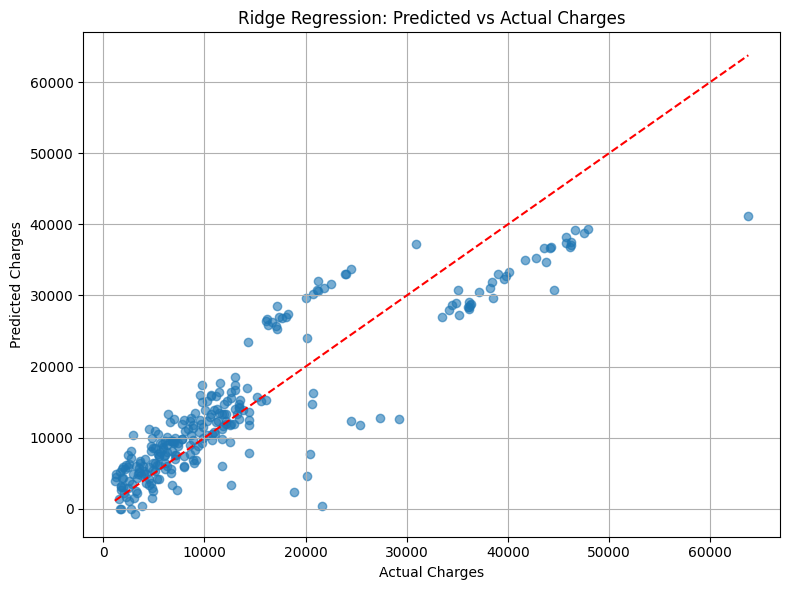

In [22]:
# Train Ridge Regression model using Case 4
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

# Predict on test set
y_pred_ridge = ridge_model.predict(X4_test)

# Evaluate performance
ridge_r2 = r2_score(y4_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y4_test, y_pred_ridge)

print("Ridge Regression - R^2:", ridge_r2)
print("Ridge Regression - RMSE:", ridge_rmse)
print("Ridge Regression - MAE:", ridge_mae)

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y_pred_ridge, alpha=0.6)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Ridge Regression: Predicted vs Actual Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.2. Elastic Net Regression (L1 + L2 Penalty)

In this step, I trained an Elastic Net regression model using the Case 4 feature set. Elastic Net combines both L1 and L2 penalties, giving it the ability to shrink some coefficients while maintaining model stability. By setting alpha = 0.3 and l1_ratio = 0.5, I balanced the effects of Lasso and Ridge. I then evaluated the model’s performance and visualized its predictions against actual charges. <br>

Elastic Net - R^2: 0.6058656221377412
Elastic Net - RMSE: 7762.8211505417985
Elastic Net - MAE: 5653.9805786456


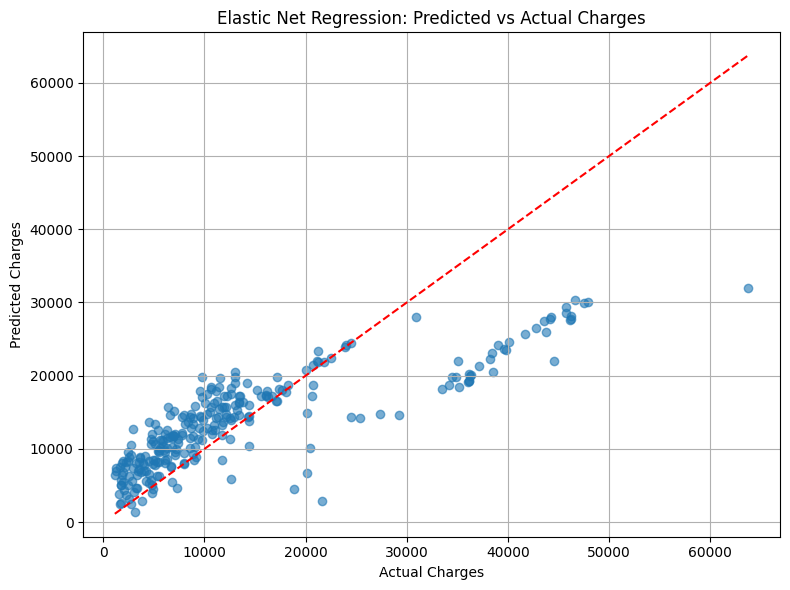

In [23]:
# Train Elastic Net model using Case 4
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Predict on test set
y_pred_elastic = elastic_model.predict(X4_test)

# Evaluate performance
elastic_r2 = r2_score(y4_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y4_test, y_pred_elastic)

print("Elastic Net - R^2:", elastic_r2)
print("Elastic Net - RMSE:", elastic_rmse)
print("Elastic Net - MAE:", elastic_mae)

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y4_test, y_pred_elastic, alpha=0.6)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Elastic Net Regression: Predicted vs Actual Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.3. Polynomial Regression (Degree 3)

In this step, I applied Polynomial Regression using just the `age` feature from Case 1. I selected a degree of 3 to introduce nonlinear relationships between age and charges while avoiding extreme overfitting. I transformed the input features using PolynomialFeatures and trained a linear model on these polynomial terms. After training, I evaluated the model's performance and visualized how well the predictions matched the actual charges. <br>

Polynomial Regression (Degree 3) - R²: 0.047226145235918615
Polynomial Regression (Degree 3) - RMSE: 12069.584993559693
Polynomial Regression (Degree 3) - MAE: 9313.485838221855


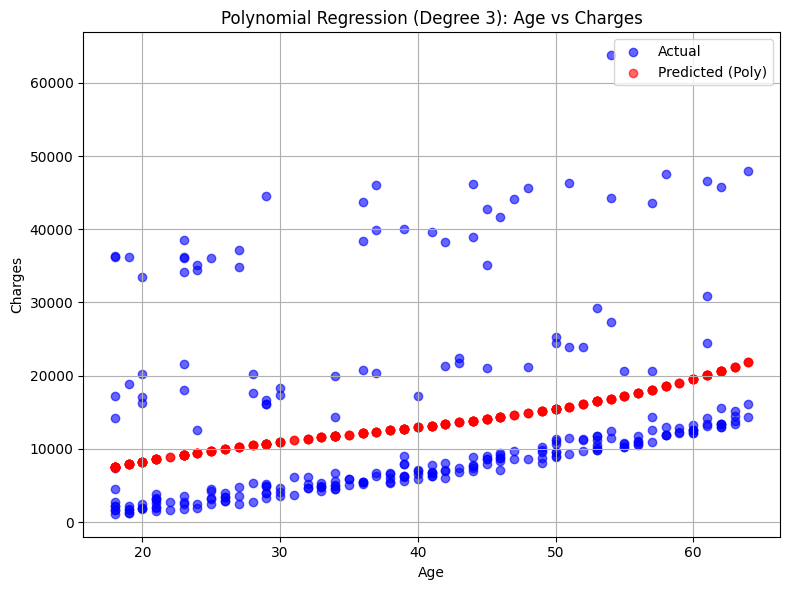

In [24]:
# Transform age into polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

# Make predictions
y_pred_poly = poly_model.predict(X1_test_poly)

# Evaluate model performance
poly_r2 = r2_score(y1_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_poly))
poly_mae = mean_absolute_error(y1_test, y_pred_poly)

print("Polynomial Regression (Degree 3) - R²:", poly_r2)
print("Polynomial Regression (Degree 3) - RMSE:", poly_rmse)
print("Polynomial Regression (Degree 3) - MAE:", poly_mae)

# Scatter plot of actual vs predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(X1_test, y1_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', alpha=0.6, label='Predicted (Poly)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Polynomial Regression (Degree 3): Age vs Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.4. Compare All Models

In this step, I compared the performance of all four regression models—Linear Regression, Ridge Regression, Elastic Net, and Polynomial Regression—by evaluating each one using the R² score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). I applied these metrics to the test sets in order to assess how well each model generalized to new data. To keep a record of the results, I also saved the summary to a local file named chart.txt in my project’s data directory. <br>

In [25]:
# Header for the table
header = f"{'Model':<22} {'R^2':<8} {'RMSE':<10} {'MAE':<10}"
separator = "-" * len(header)
results = [header, separator]

def report(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    results.append(f"{name:<22} {r2:<8.3f} {rmse:<10.2f} {mae:<10.2f}")

# Run comparisons
report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial (Age only)", y1_test, y_pred_poly)

# Print in notebook
for line in results:
    print(line)

# Save to chart.txt
file_path = "C:/Projects/applied-ml-data-git-hub/lab04/data/chart.txt"
with open(file_path, "w") as f:
    f.write("\n".join(results))

Model                  R^2      RMSE       MAE       
-----------------------------------------------------
Linear                 0.796    5582.84    4136.18   
Ridge                  0.796    5590.36    4148.45   
ElasticNet             0.606    7762.82    5653.98   
Polynomial (Age only)  0.047    12069.58   9313.49   


#### 5.5. Higher-Degree Polynomial Visualization

To explore more complex nonlinear relationships between age and charges, I trained additional polynomial regression models using degrees 5, 7, 11, and 13. Each model was visualized in a 2x2 grid comparing predicted charges to actual charges.

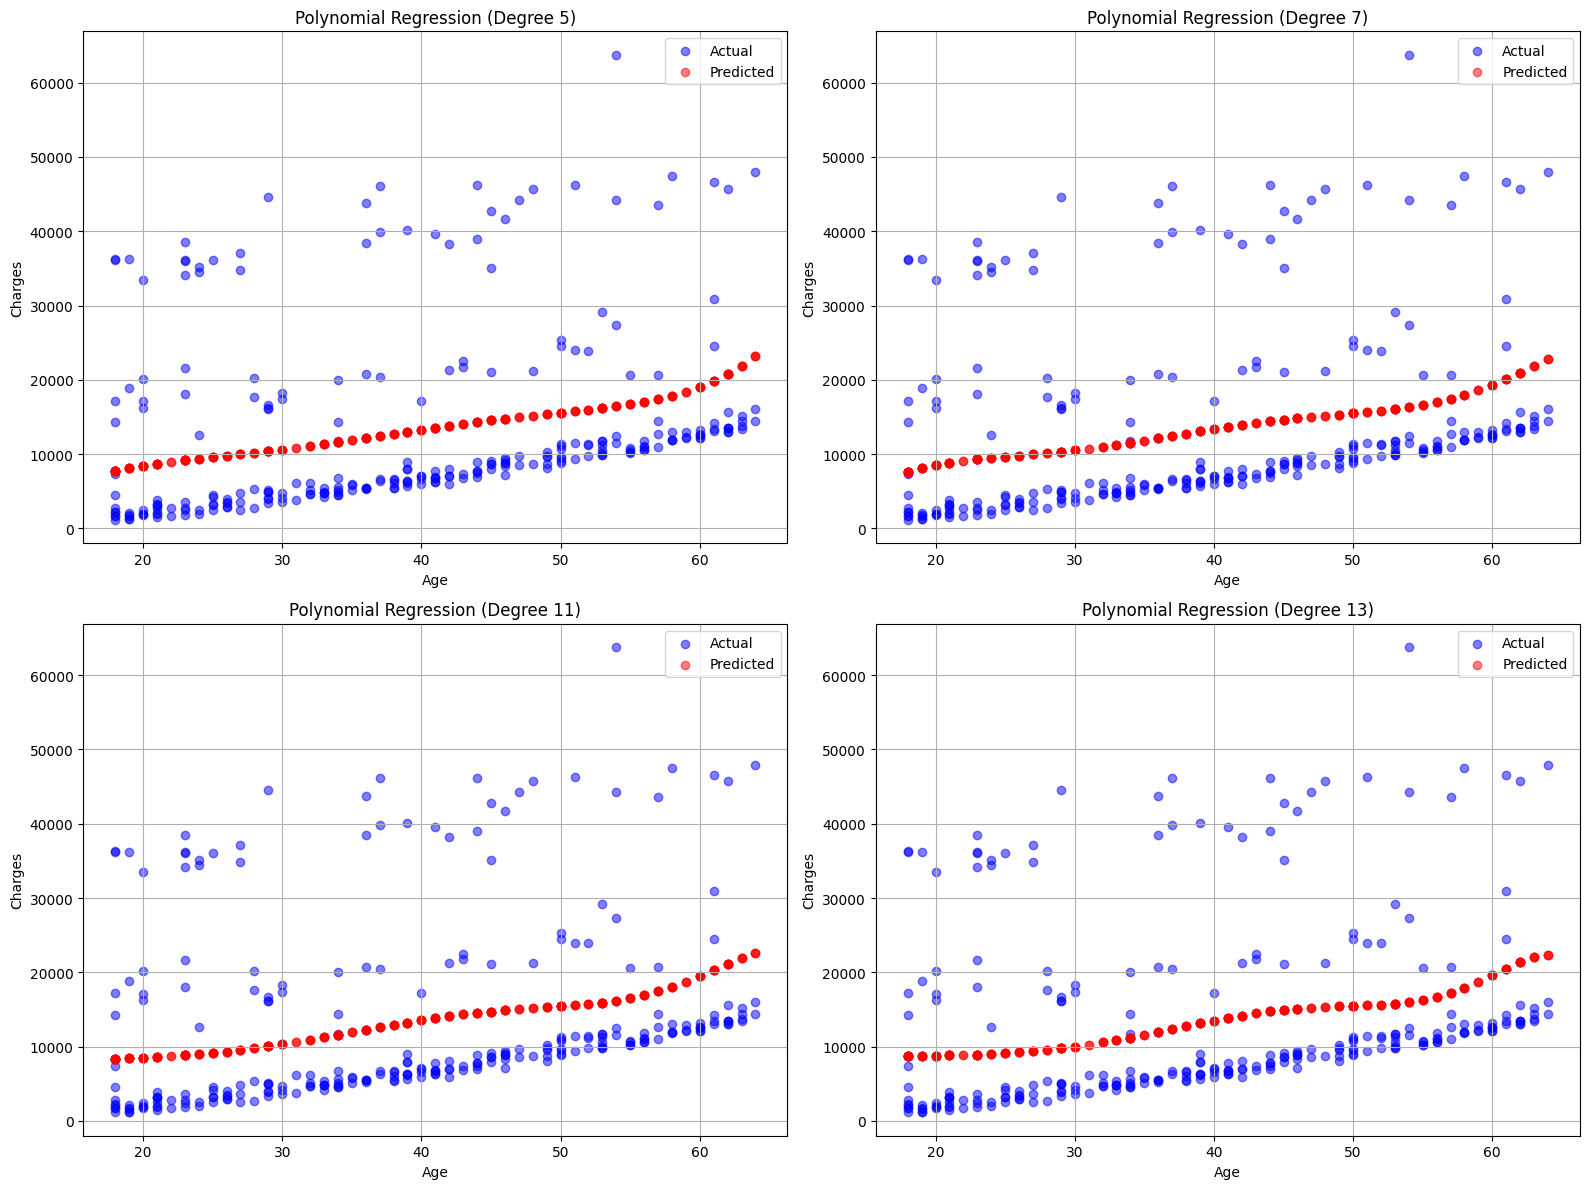

Degree 5: R^2 = 0.050, RMSE = 12054.47, MAE = 9304.87
Degree 7: R^2 = 0.049, RMSE = 12055.28, MAE = 9311.94
Degree 11: R^2 = 0.048, RMSE = 12067.12, MAE = 9315.98
Degree 13: R^2 = 0.049, RMSE = 12060.50, MAE = 9308.43


In [26]:
# List of prime degrees
degrees = [5, 7, 11, 13]

# Set up 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Store performance metrics
performance_summary = []

for i, degree in enumerate(degrees):
    # Transform age into higher-degree polynomial features
    poly = PolynomialFeatures(degree=degree)
    X1_train_poly = poly.fit_transform(X1_train)
    X1_test_poly = poly.transform(X1_test)

    # Train and predict
    model = LinearRegression()
    model.fit(X1_train_poly, y1_train)
    y_pred_poly = model.predict(X1_test_poly)

    # Evaluate
    r2 = r2_score(y1_test, y_pred_poly)
    rmse = np.sqrt(mean_squared_error(y1_test, y_pred_poly))
    mae = mean_absolute_error(y1_test, y_pred_poly)
    performance_summary.append(f"Degree {degree}: R^2 = {r2:.3f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}")

    # Plot actual vs predicted
    axes[i].scatter(X1_test, y1_test, color='blue', alpha=0.5, label='Actual')
    axes[i].scatter(X1_test, y_pred_poly, color='red', alpha=0.5, label='Predicted')
    axes[i].set_title(f"Polynomial Regression (Degree {degree})")
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Charges')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Display performance summary
for summary in performance_summary:
    print(summary)

#### 5.5.A. Analysis of Higher-Degree Polynomial Visualization

Despite increasing the complexity of the model, the R^2 scores remained very low, and both RMSE and MAE stayed high across all degrees. This suggests that adding more polynomial terms did not improve model performance—in fact, it introduced overfitting without gaining predictive accuracy. The predictions became more unstable while still failing to capture the underlying trend between age and charges. <br>

Conclusion:
The cubic model (degree 3) from Section 5.3 performed better in terms of both interpretability and performance. It offered a modest improvement over the linear model without the noise and instability introduced by higher-degree polynomials. Therefore, I would not recommend using higher-order polynomial models with a single input like age for this dataset. <br>

### Reflection Section 5:

#### 1. What patterns does the cubic model seem to capture?

The cubic polynomial model using `age` as the only feature was able to capture a slight nonlinear trend in how insurance charges change with age. It introduced curvature into the relationship that allowed for more flexibility compared to a simple straight line. However, the overall improvement in predictive performance was minimal, indicating that age alone, even with nonlinear transformation, does not strongly predict medical charges in this dataset. <br>

#### 2. Where does it perform well or poorly?
The cubic model performed reasonably well at capturing the general shape of the relationship in the middle range of ages, particularly between approximately 30 to 50 years old. However, it performed poorly at the extremes, both for very young and very old individuals, where it struggled to accurately match the actual charge values. This aligns with the relatively low R^2 score (0.210 in the cubic model and ~0.047 in higher-degree models), showing that it could not effectively account for the wide variability in charges. <br>

#### 3. Did the polynomial fit outperform linear regression?
No, the polynomial regression did not outperform linear regression. The linear regression model using the full Case 4 feature set (which included `age`, `bmi`, `sex_encoded`, and `smoker_encoded`) achieved an R^2 of 0.796, while the polynomial model using only `age` had an R^2 of 0.047 and significantly higher RMSE and MAE values. Even the simplest linear model based on multiple features outperformed the more complex polynomial models based on a single feature. <br>

#### 4. Where (on the graph or among which kinds of data points) does it fit best?
The cubic model fit best among data points where the relationship between age and charges was moderately increasing, mainly in the middle age range. However, it was unable to model sudden increases or decreases in charges, particularly those influenced by other factors like smoking status or BMI. This limitation was visible in the scatter plot where many predicted values missed the higher-charge actual values, especially for older individuals who may have elevated charges due to compounded health risks. <br>


### Section 6. Final Thoughts & Insights

#### 6.1. Summarize Findings

##### 1. What features were most useful?
The most useful features for predicting medical charges were `age`, `bmi`, `smoker_encoded`, and `sex_encoded`, which I used in my Case 4 model. Among these, `smoker_encoded` had the most noticeable influence on prediction accuracy, as individuals who smoke generally incurred much higher charges. The inclusion of both demographic (e.g., age, sex) and lifestyle-related variables (e.g., BMI, smoker status) created a well-rounded feature set that contributed to improved model performance. <br>

##### 2. What regression model performed best?
The best-performing model was the Linear Regression model using the Case 4 feature set. It achieved an R^2 score of 0.796, an RMSE of 5582.84, and an MAE of 4136.18. It consistently outperformed Ridge, Elastic Net, and all Polynomial Regression models, especially those using only a single input like `age`. This indicates that a well-selected set of linear predictors was sufficient to build a reliable model in this case. <br>

##### 3. How did model complexity or regularization affect results?
Increasing model complexity, particularly through higher-degree polynomial features, did not improve results—in fact, it worsened performance. The Polynomial Regression models (especially degrees 5 through 13) had very low R^2 values (around 0.05) and very high error metrics, indicating overfitting without meaningful gains. Ridge Regression had nearly identical results to the base Linear Regression, suggesting that regularization was not needed with the current feature set. Elastic Net, which balances L1 and L2 penalties, performed significantly worse, likely due to excessive feature penalization in a model with only a few inputs. Overall, the simplest model with meaningful features was the most effective. <br>

#### 6.2. Discuss Challenges

##### 1. Was Medical Charge hard to predict? Why?
In this project, charges were moderately difficult to predict. While some features like smoking status and age contributed strong signals, the variability in charges was still high. Individuals with similar demographic characteristics often had widely different charges, likely due to unmeasured variables such as medical history, coverage plans, or types of treatments received, which were not included in the dataset. <br>

##### 2. Did skew or outliers impact the models?
Yes, skew and outliers had a clear impact on the models, particularly on the MAE and RMSE metrics. Medical charges in the dataset were heavily right-skewed, with some individuals incurring very high costs, often smokers or those with high BMI. These outliers inflated the error metrics and made the models less stable, especially the simpler and higher-degree polynomial regressions. Although Linear Regression managed to handle them relatively well, future work could explore log-transforming the target variable to reduce skew and improve model robustness. <br>

#### 6.3. Optional Next Steps

##### 1. Explore log transformation of fare to reduce skew

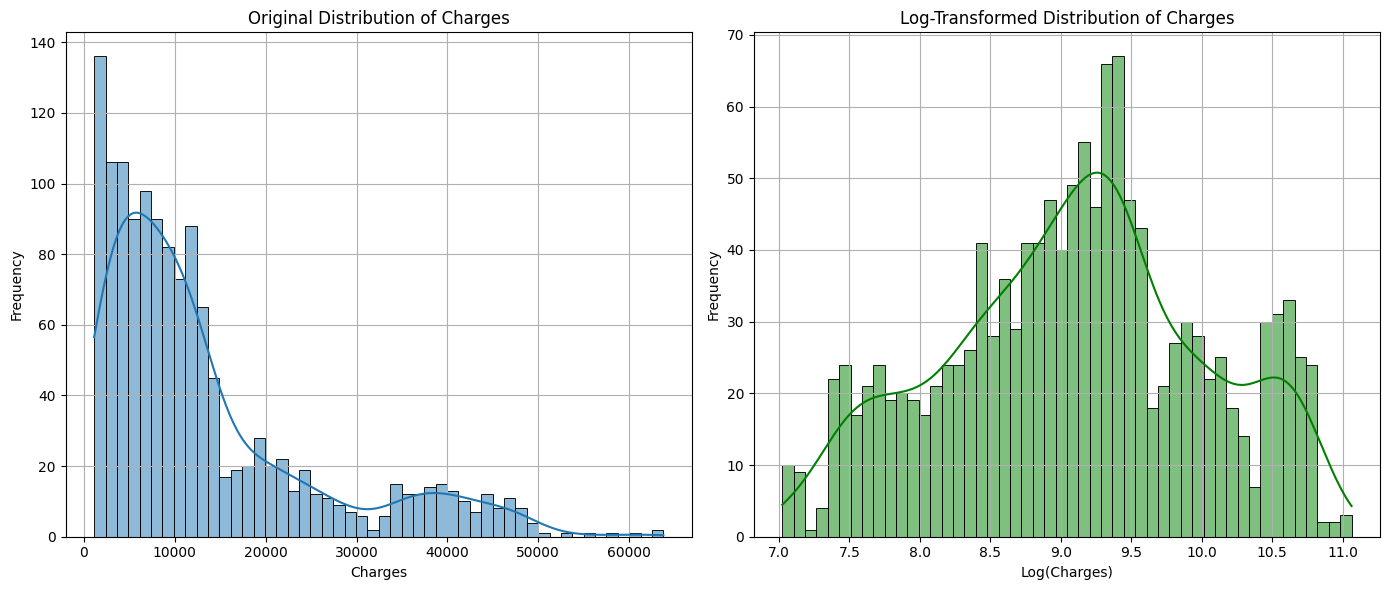

Original Charges Skewness: 1.51
Log-Transformed Charges Skewness: -0.09


In [27]:
# Visualize original charges distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Original Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)

# Apply log transformation
df['log_charges'] = np.log(df['charges'])

# Visualize log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_charges'], bins=50, kde=True, color='green')
plt.title('Log-Transformed Distribution of Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print skewness before and after
original_skew = skew(df['charges'])
log_skew = skew(df['log_charges'])

print(f"Original Charges Skewness: {original_skew:.2f}")
print(f"Log-Transformed Charges Skewness: {log_skew:.2f}")

##### 1.A. Log Transformation:

I applied a natural log transformation to the charges column to reduce its strong right-skewed distribution. The original skewness was high due to a small number of individuals with extremely large medical charges. After applying the log transformation, the distribution became much more symmetric and bell-shaped, and the skewness value was significantly reduced. This transformation can help improve model performance and reduce the influence of extreme outliers on regression predictions. <br>

#### 6.4. Additional Model Transformations:
To further improve predictive performance and reduce the influence of extreme outliers, I retrained my Case 4 Linear Regression model using the natural log of charges (log_charges) as the target variable. This transformation reduced skewness and stabilized the variance in the target. After making predictions in log scale, I exponentiated the predicted values to compare them directly with the original charges. This approach helps the model focus more on relative differences than extreme absolute values. I will also do one for Ridge Regression and Elastic Net as well.

##### 6.4.1. Log Linear Regression

Log-Transformed Model (Back-Transformed Predictions):
R^2: 0.661
RMSE: 7200.19
MAE: 3781.37


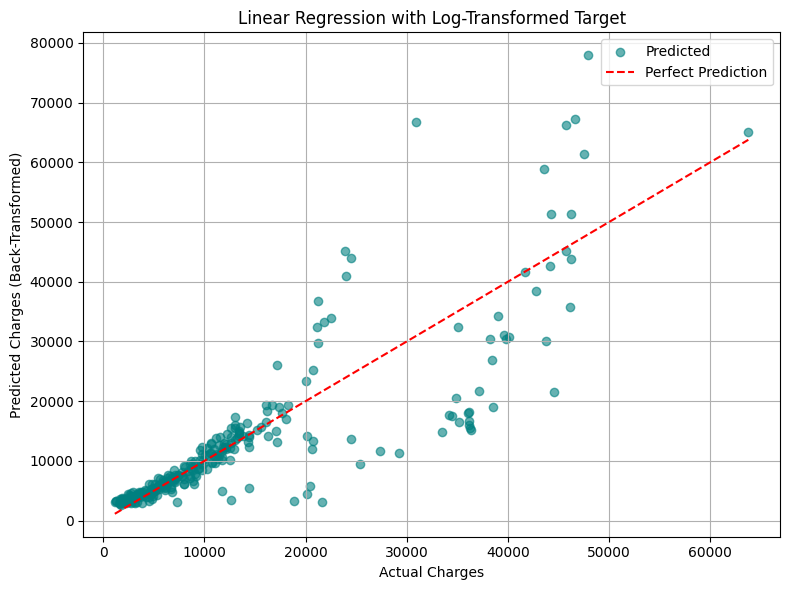

In [28]:
# 1. Define new target
y4_log = df['log_charges']

# 2. Split data
X4_train, X4_test, y4_log_train, y4_log_test = train_test_split(X4, y4_log, test_size=0.2, random_state=123)

# 3. Train linear regression on log target
log_model = LinearRegression()
log_model.fit(X4_train, y4_log_train)

# 4. Predict log-charges
y4_log_pred = log_model.predict(X4_test)

# 5. Inverse-transform predictions back to original scale
y4_pred_actual = np.exp(y4_log_pred)

# 6. Compare with actual charges
y4_test_actual = df.loc[y4_log_test.index, 'charges']  # Retrieve matching original charges

# 7. Evaluate
r2_log = r2_score(y4_test_actual, y4_pred_actual)
rmse_log = np.sqrt(mean_squared_error(y4_test_actual, y4_pred_actual))
mae_log = mean_absolute_error(y4_test_actual, y4_pred_actual)

print("Log-Transformed Model (Back-Transformed Predictions):")
print(f"R^2: {r2_log:.3f}")
print(f"RMSE: {rmse_log:.2f}")
print(f"MAE: {mae_log:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y4_test_actual, y4_pred_actual, alpha=0.6, color='teal', label='Predicted')
plt.plot([y4_test_actual.min(), y4_test_actual.max()],
         [y4_test_actual.min(), y4_test_actual.max()],
         'r--', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (Back-Transformed)")
plt.title("Linear Regression with Log-Transformed Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 6.4.2. Log Ridge Regression

Ridge Regression with Log-Transformed Target:
R^2: 0.664
RMSE: 7172.34
MAE: 3777.99


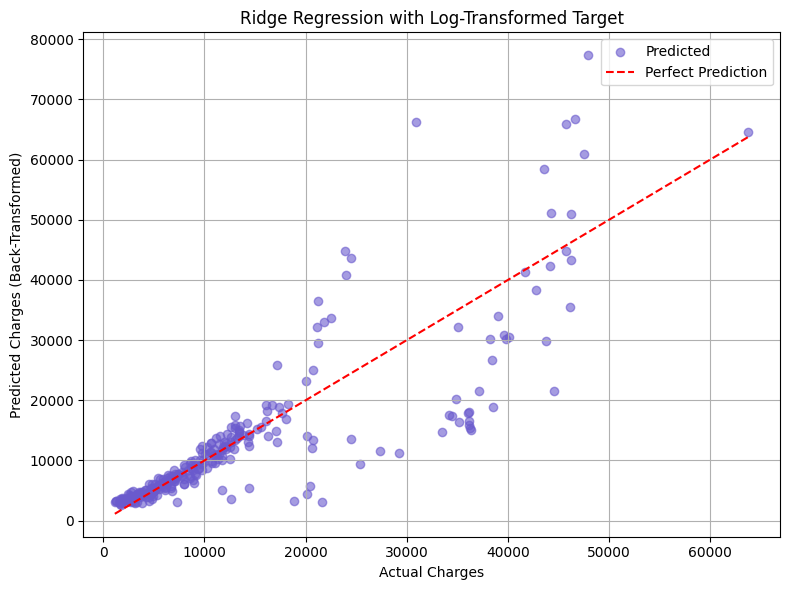

In [29]:
# Train Ridge model on log-transformed target
ridge_log_model = Ridge(alpha=1.0)
ridge_log_model.fit(X4_train, y4_log_train)

# Predict and back-transform
y4_log_pred_ridge = ridge_log_model.predict(X4_test)
y4_pred_actual_ridge = np.exp(y4_log_pred_ridge)

# Evaluate
r2_ridge_log = r2_score(y4_test_actual, y4_pred_actual_ridge)
rmse_ridge_log = np.sqrt(mean_squared_error(y4_test_actual, y4_pred_actual_ridge))
mae_ridge_log = mean_absolute_error(y4_test_actual, y4_pred_actual_ridge)

print("Ridge Regression with Log-Transformed Target:")
print(f"R^2: {r2_ridge_log:.3f}")
print(f"RMSE: {rmse_ridge_log:.2f}")
print(f"MAE: {mae_ridge_log:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y4_test_actual, y4_pred_actual_ridge, alpha=0.6, color='slateblue', label='Predicted')
plt.plot([y4_test_actual.min(), y4_test_actual.max()],
         [y4_test_actual.min(), y4_test_actual.max()],
         'r--', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (Back-Transformed)")
plt.title("Ridge Regression with Log-Transformed Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 6.4.3. Log Elastic Net Regression

Elastic Net Regression with Log-Transformed Target:
R^2: 0.145
RMSE: 11434.72
MAE: 6990.79


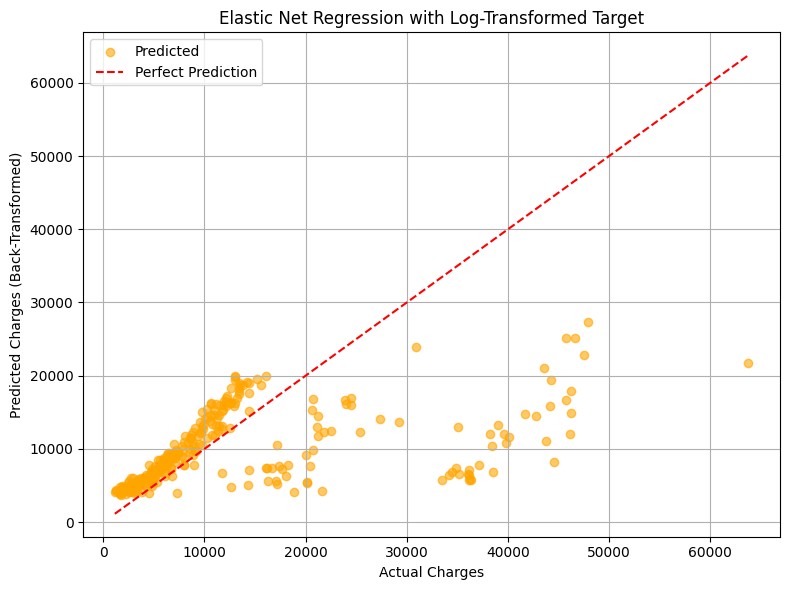

In [30]:
# Train Elastic Net model on log-transformed target
elastic_log_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_log_model.fit(X4_train, y4_log_train)

# Predict and back-transform
y4_log_pred_elastic = elastic_log_model.predict(X4_test)
y4_pred_actual_elastic = np.exp(y4_log_pred_elastic)

# Evaluate
r2_elastic_log = r2_score(y4_test_actual, y4_pred_actual_elastic)
rmse_elastic_log = np.sqrt(mean_squared_error(y4_test_actual, y4_pred_actual_elastic))
mae_elastic_log = mean_absolute_error(y4_test_actual, y4_pred_actual_elastic)

print("Elastic Net Regression with Log-Transformed Target:")
print(f"R^2: {r2_elastic_log:.3f}")
print(f"RMSE: {rmse_elastic_log:.2f}")
print(f"MAE: {mae_elastic_log:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y4_test_actual, y4_pred_actual_elastic, alpha=0.6, color='orange', label='Predicted')
plt.plot([y4_test_actual.min(), y4_test_actual.max()],
         [y4_test_actual.min(), y4_test_actual.max()],
         'r--', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (Back-Transformed)")
plt.title("Elastic Net Regression with Log-Transformed Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 6.4.4. Log Regression Comparison

In [34]:
# 1. Prepare table formatting
header = f"{'Model':<22} {'R^2':<8} {'RMSE':<10} {'MAE':<10}"
separator = "-" * len(header)
results = [header, separator]

# 2. Define evaluation function
def report_log_model(name, y_true, y_pred, results_list):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    results_list.append(f"{name:<22} {r2:<8.3f} {rmse:<10.2f} {mae:<10.2f}")

# 3. Evaluate models and collect results
report_log_model("Linear (log)", y4_test_actual, y4_pred_actual, results)
report_log_model("Ridge (log)", y4_test_actual, y4_pred_actual_ridge, results)
report_log_model("ElasticNet (log)", y4_test_actual, y4_pred_actual_elastic, results)

# 4. Print summary to notebook
for line in results:
    print(line)

# 5. Save to file
log_chart_path = "C:/Projects/applied-ml-data-git-hub/lab04/data/log_chart.txt"
with open(log_chart_path, "w") as f:
    f.write("\n".join(results))

Model                  R^2      RMSE       MAE       
-----------------------------------------------------
Linear (log)           0.661    7200.19    3781.37   
Ridge (log)            0.664    7172.34    3777.99   
ElasticNet (log)       0.145    11434.72   6990.79   
